In [1]:
import os
import sys 
import random
import time 
import tensorflow as tf 

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model 

In [2]:
from sine_model import SineModel
from sinusoid_generator import SinusoidGenerator, generate_dataset, plot
from train_sine_model import * 


In [3]:
train_ds, test_ds = generate_dataset(K=10) 
model = SineModel()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-18 22:47:44.750721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-18 22:47:44.750828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Step 1000: loss = 3.6614204344315007, Time to run 1000 steps = 1.55 seconds
Step 2000: loss = 3.528342882680913, Time to run 1000 steps = 1.47 seconds
Step 3000: loss = 3.4634678002522574, Time to run 1000 steps = 1.51 seconds
Step 4000: loss = 3.4313948738724265, Time to run 1000 steps = 1.50 seconds
Step 5000: loss = 3.406983384801294, Time to run 1000 steps = 1.49 seconds
Step 6000: loss = 3.3798228096133154, Time to run 1000 steps = 1.51 seconds
Step 7000: loss = 3.3468997709986823, Time to run 1000 steps = 1.49 seconds
Step 8000: loss = 3.3216568061741745, Time to run 1000 steps = 1.46 seconds
Step 9000: loss = 3.3021616801449185, Time to run 1000 steps = 1.46 seconds
Step 10000: loss = 3.282180069330098, Time to run 1000 steps = 1.46 seconds
Step 11000: loss = 3.2728138249279066, Time to run 1000 steps = 1.46 seconds
Step 12000: loss = 3.2541744799458354, Time to run 1000 steps = 1.46 seconds
Step 13000: loss = 3.2473703113271783, Time to run 1000 steps = 1.45 seconds
Step 14000:

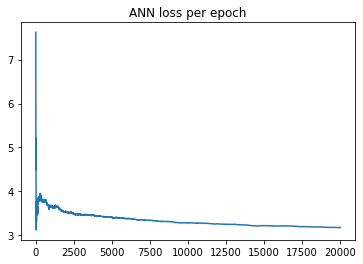

Step 1000: loss = 2.8019969423413618, Time to run 1000 steps = 7.66
Step 2000: loss = 2.2836612713065407, Time to run 1000 steps = 7.48
Step 3000: loss = 1.9351218612624563, Time to run 1000 steps = 7.83
Step 4000: loss = 1.7107825736743765, Time to run 1000 steps = 8.03
Step 5000: loss = 1.5324043255008777, Time to run 1000 steps = 7.80
Step 6000: loss = 1.4031432181763464, Time to run 1000 steps = 7.62
Step 7000: loss = 1.3024322043403627, Time to run 1000 steps = 7.80
Step 8000: loss = 1.2168899274703435, Time to run 1000 steps = 7.66
Step 9000: loss = 1.1491368726565334, Time to run 1000 steps = 7.77
Step 10000: loss = 1.0869050527467945, Time to run 1000 steps = 7.64
Step 11000: loss = 1.0312908371978684, Time to run 1000 steps = 7.81
Step 12000: loss = 0.9847883098426305, Time to run 1000 steps = 7.84
Step 13000: loss = 0.9425599985164194, Time to run 1000 steps = 7.73
Step 14000: loss = 0.9051727085483748, Time to run 1000 steps = 7.75
Step 15000: loss = 0.8715889695980658, Time

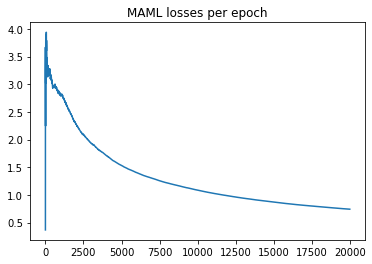

In [25]:
from copy import copy
with tf.device("cpu:0"):
    model1 = SineModel()
    model2 = copy(model1)
    train_ds, test_ds = generate_dataset(K=10)

    name = ['ANN K=10 lr=0.001', 'MAML K=10 Alpha=0.01 Beta=0.001']
    neural_model, ann_loss = regular_train(model1, train_ds)

    maml_model, maml_loss = maml_train(model2, train_ds) 
    
    


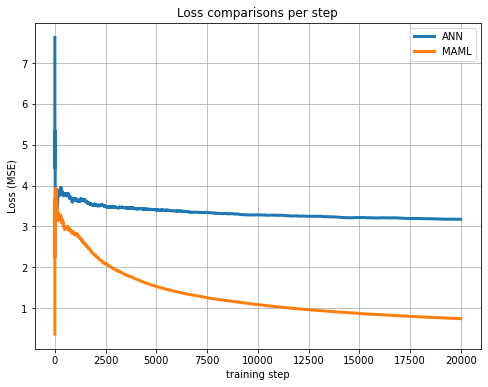

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(ann_loss, label='ANN', linewidth=3)
plt.plot(maml_loss, label='MAML', linewidth=3) 
plt.legend(); plt.grid() 
plt.xlabel("training step"); plt.ylabel("Loss (MSE)")
plt.title("Loss comparisons per step") 
plt.show() 

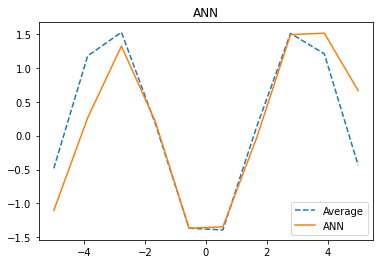

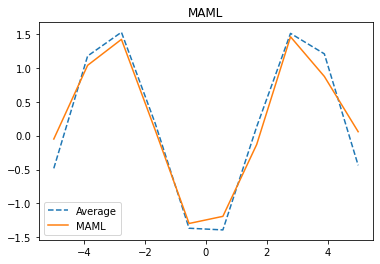

In [28]:
plot_model_comparison_to_average(neural_model, train_ds, model_name='ANN', K=10)
plot_model_comparison_to_average(maml_model, train_ds, model_name="MAML", K=10)

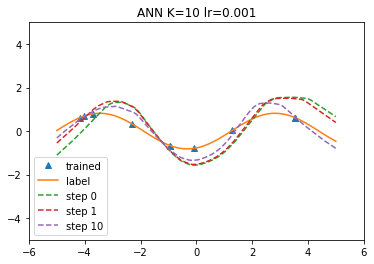

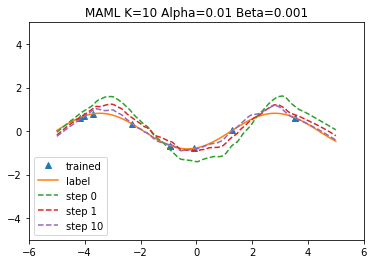

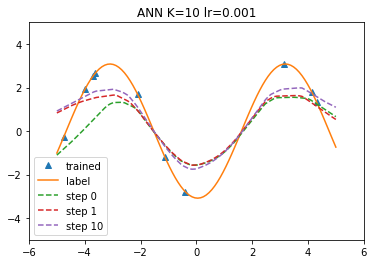

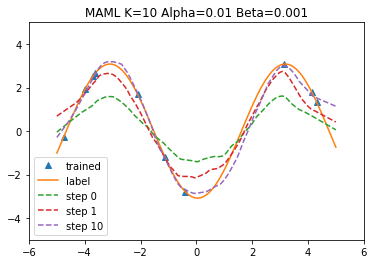

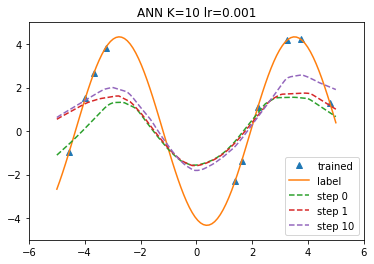

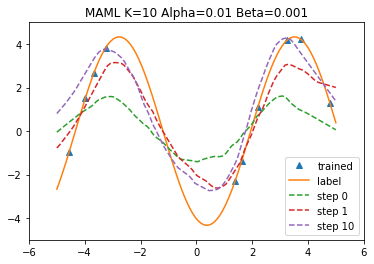

In [29]:
with tf.device("cpu:0"):
    for idx in np.random.randint(0, len(test_ds), size=3):
        eval_sinewave_for_test(neural_model, test_ds[idx], name=name[0])
        eval_sinewave_for_test(maml_model, test_ds[idx], name=name[1])

In [17]:
neural_model.layers[0].kernel == maml_model.layers[0].kernel

<tf.Tensor: shape=(1, 40), dtype=bool, numpy=
array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]])>